#Trabalhando com Planilhas do Excel


In [2]:
#Importando a biblioteca
import pandas as pd


In [4]:
#leitura dos arquivos
df1 = pd.read_excel("/content/sample_data/Aracaju.xlsx")
df2 = pd.read_excel("/content/sample_data/Fortaleza.xlsx")
df3 = pd.read_excel("/content/sample_data/Natal.xlsx")
df4 = pd.read_excel("/content/sample_data/Recife.xlsx")
df5 = pd.read_excel("/content/sample_data/Salvador.xlsx")

In [5]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
#Exibindo as 5 primeiras linhas 
df.head()


,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
#exibindo as 5 ultimas linhas 
df.tail()


,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
#alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
df.head()


,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


#Tratamdo valores nulos

In [12]:
#consultando linhas com valores nulos
df.isnull().sum()



Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0,inplace=True)


In [15]:
#apagando as linhas com valores nulos
df.dropna(inplace=True)


In [16]:
#substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [17]:
#apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [18]:
#removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

#Criando colunas novas

In [19]:
#criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])


In [20]:
df.head()


,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [21]:
#criando um coluna para achar a quantidade de produtos vendidos (caso não tenha coluna QTD)
df["Receita/Vendas"]= df["Receita"]/ df["Vendas"]

In [22]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [23]:
#retorna a menor receita
df["Receita"].min()

3.34

In [24]:
#nllargest, Serve para retornar os maiores valores primeiro argumento QTD e segundo args Coluna (Receita)
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [25]:
#agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [27]:
#Ordenando o dataset 
df.sort_values("Receita", ascending=False).head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0


#Trabalhando com Datas

In [28]:
#transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [29]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [30]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [31]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [32]:
#agrupamento por ano
df.groupby(df['Data'].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [33]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [34]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
229,Natal,2019-01-02,43.08,1036,2,86.16,2.0,2019
53,Salvador,2019-01-01,39.50,1035,3,118.50,3.0,2019
88,Natal,2019-01-02,31.20,1036,1,31.20,1.0,2019
43,Aracaju,2018-01-01,19.63,1523,9,176.67,9.0,2018
84,Natal,2019-01-02,22.99,1036,1,22.99,1.0,2019


In [36]:
#extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df['Data'].dt.day)

In [37]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
13,Fortaleza,2019-02-12,118.58,1003,4,474.32,4.0,2019,2,12
190,Salvador,2019-01-02,78.78,1035,3,236.34,3.0,2019,1,2
168,Salvador,2019-01-02,20.22,1036,1,20.22,1.0,2019,1,2
230,Salvador,2019-01-03,184.69,1036,1,184.69,1.0,2019,1,3
60,Natal,2018-05-02,534.00,852,3,1602.00,3.0,2018,5,2


In [38]:
#retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [39]:
#Calculando a diferença de dias
df["diferenca_dias"] = df['Data'] - df['Data'].min()

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
54,Fortaleza,2019-01-01,16.73,1002,5,83.65,5.0,2019,1,1,365 days
8,Fortaleza,2019-02-11,37.49,1005,1,37.49,1.0,2019,2,11,406 days
87,Recife,2019-01-01,210.06,983,4,840.24,4.0,2019,1,1,365 days
216,Salvador,2019-01-02,5.82,1035,1,5.82,1.0,2019,1,2,366 days
205,Natal,2019-01-02,196.09,1037,1,196.09,1.0,2019,1,2,366 days


In [41]:
#criando a coluna de trimestre
df["trimestre_venda"] = df['Data'].dt.quarter

In [42]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year==2019) & (df['Data'].dt.month == 3)]

#Visualização de dados

In [43]:
df["LojaID"].value_counts(ascending=False)


1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

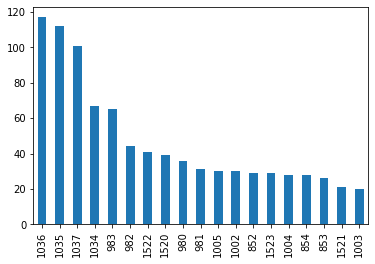

In [46]:
#gráfico de baarras
df['LojaID'].value_counts(ascending=False).plot.bar();


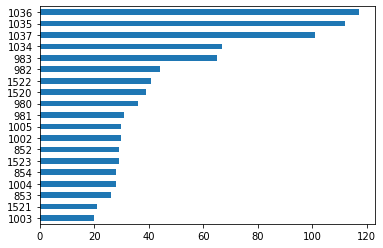

In [47]:
#grágico de barras horizontais
df['LojaID'].value_counts(ascending=True).plot.barh()

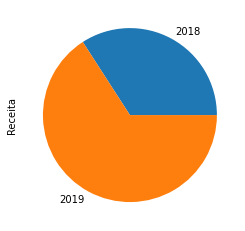

In [48]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [51]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

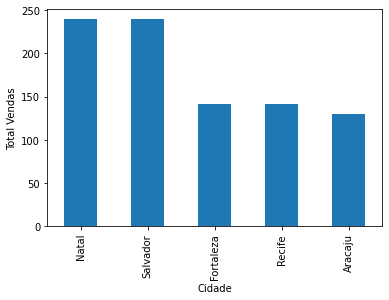

In [52]:
#adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar("Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

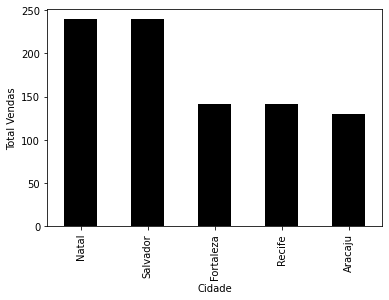

In [56]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar("Total vendas por Cidade", color="black")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [57]:
#Alterando  o estilo
plt.style.use("ggplot")

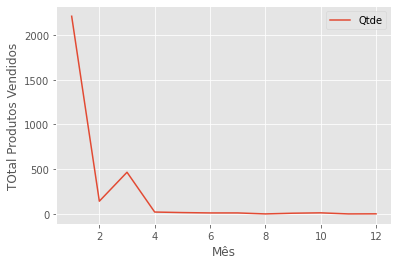

In [65]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot()
plt.xlabel("Mês")#para protar o nome do eixo X
plt.ylabel("TOtal Produtos Vendidos");
plt.legend()#legenda QTD


In [66]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [69]:
#selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

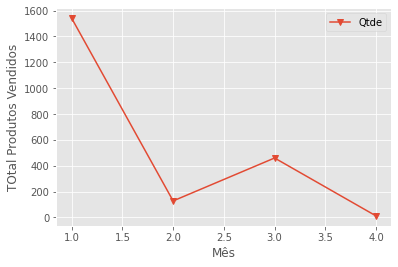

In [70]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")#para protar o nome do eixo X
plt.ylabel("TOtal Produtos Vendidos");
plt.legend()#legenda QTD

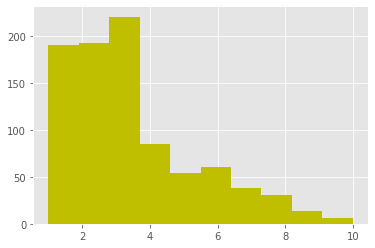

In [74]:
#Histograma
plt.hist(df["Qtde"], color="y");

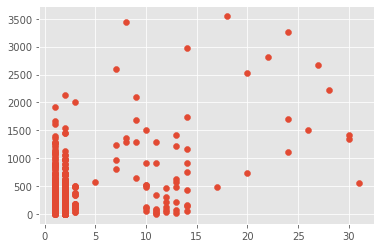

In [73]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

In [ ]:
#salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")#para protar o nome do eixo X
plt.ylabel("TOtal Produtos Vendidos");
plt.legend()#legenda QTD
plt.savefing("grafico QTDE x Mes.png")